# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | vangviang
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | labrador city
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | cullera
Processing Record 12 of Set 1 | ash shafa
City not found. Skipping...
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | maubara
City not found. Skipping...
Processing Record 15 of Set 1 | laojunmiao
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | lethem
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | tukrah
Processing Record 20 of Set 1 | margaret river
Processing

Processing Record 37 of Set 4 | manicore
Processing Record 38 of Set 4 | sinjai
Processing Record 39 of Set 4 | opuwo
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | atasu
Processing Record 42 of Set 4 | wellston
Processing Record 43 of Set 4 | argo
Processing Record 44 of Set 4 | altdorf
Processing Record 45 of Set 4 | rasskazovo
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | badger
Processing Record 48 of Set 4 | petropavlovsk-kamchatsky
Processing Record 49 of Set 4 | riverton
Processing Record 0 of Set 5 | al ghayzah
Processing Record 1 of Set 5 | usogorsk
Processing Record 2 of Set 5 | vuktyl
Processing Record 3 of Set 5 | udachny
Processing Record 4 of Set 5 | iskateley
Processing Record 5 of Set 5 | minot air force base
Processing Record 6 of Set 5 | sao tome
Processing Record 7 of Set 5 | ad dabbah
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | olonkinbyen
Processing Record 10 of Set 5 | sao joao da ba

Processing Record 30 of Set 8 | ostersund
Processing Record 31 of Set 8 | stephenville
Processing Record 32 of Set 8 | siwa oasis
Processing Record 33 of Set 8 | philadelphia
Processing Record 34 of Set 8 | yugorsk
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | amahai
Processing Record 37 of Set 8 | midvagur
Processing Record 38 of Set 8 | emmett
Processing Record 39 of Set 8 | tsumeb
Processing Record 40 of Set 8 | saint-louis
Processing Record 41 of Set 8 | cutlerville
Processing Record 42 of Set 8 | santa terezinha
Processing Record 43 of Set 8 | villa huidobro
Processing Record 44 of Set 8 | taroa
Processing Record 45 of Set 8 | aasiaat
Processing Record 46 of Set 8 | el bauga
Processing Record 47 of Set 8 | svetlyy
Processing Record 48 of Set 8 | visakhapatnam
Processing Record 49 of Set 8 | padang
Processing Record 0 of Set 9 | ijuw
City not found. Skipping...
Processing Record 1 of Set 9 | dudinka
Processing Record 2 of Set 9 | jiaojiang
Processing Record

Processing Record 20 of Set 12 | xishan
Processing Record 21 of Set 12 | sao borja
Processing Record 22 of Set 12 | bentiu
Processing Record 23 of Set 12 | inongo
Processing Record 24 of Set 12 | pedra azul
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | carolina beach
Processing Record 27 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 28 of Set 12 | visby
Processing Record 29 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 30 of Set 12 | espoo
Processing Record 31 of Set 12 | krutaya gorka
Processing Record 32 of Set 12 | bayanhongor
Processing Record 33 of Set 12 | bridgewater
Processing Record 34 of Set 12 | ambovombe
Processing Record 35 of Set 12 | antonio enes
Processing Record 36 of Set 12 | raja
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | saint-georges
Processing Record 39 of Set 12 | caleta de carquin
Processing Record 40 of Set 12 | anloga
Processing Record 41 of Set 12 | bu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acarau,-2.8856,-40.1200,26.28,80,25,6.86,BR,1688603764
1,vangviang,18.9333,102.4500,26.35,87,31,0.19,LA,1688603691
2,invercargill,-46.4000,168.3500,8.97,65,7,0.98,NZ,1688603847
3,labrador city,52.9463,-66.9114,24.95,41,40,1.54,CA,1688603847
4,iqaluit,63.7506,-68.5145,6.85,93,75,2.57,CA,1688603847


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,26.28,80,25,6.86,BR,1688603764
1,vangviang,18.9333,102.4500,26.35,87,31,0.19,LA,1688603691
2,invercargill,-46.4000,168.3500,8.97,65,7,0.98,NZ,1688603847
3,labrador city,52.9463,-66.9114,24.95,41,40,1.54,CA,1688603847
4,iqaluit,63.7506,-68.5145,6.85,93,75,2.57,CA,1688603847


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

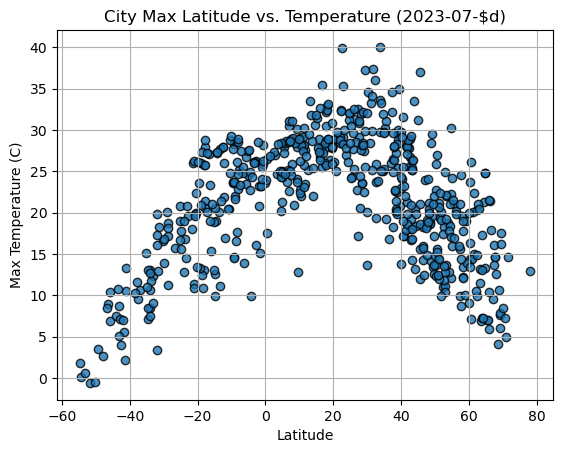

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-$d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

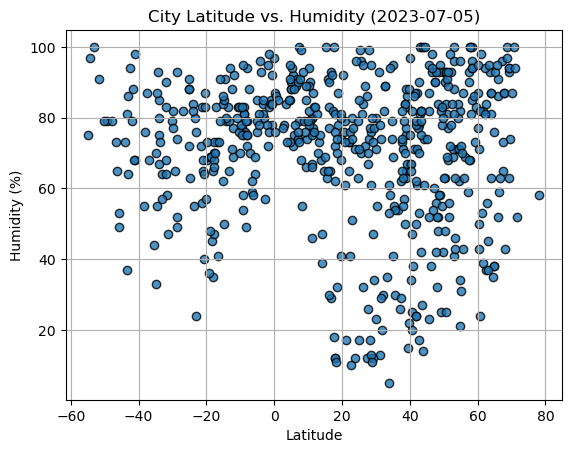

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

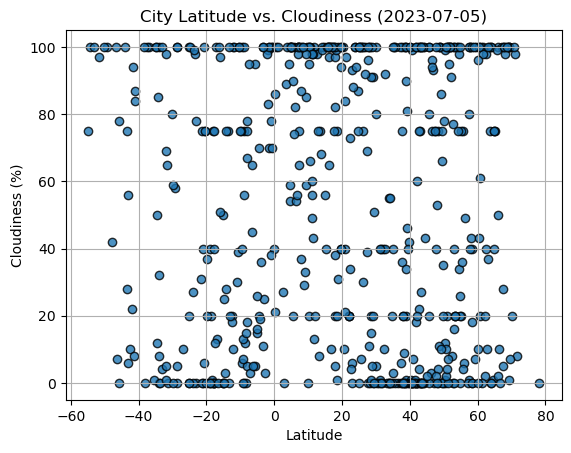

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

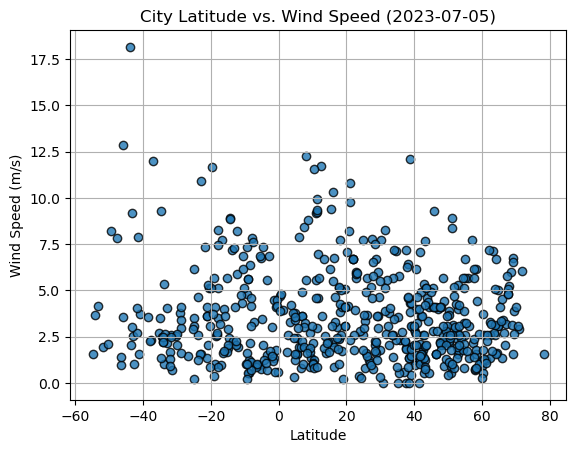

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vangviang,18.9333,102.4500,26.35,87,31,0.19,LA,1688603691
3,labrador city,52.9463,-66.9114,24.95,41,40,1.54,CA,1688603847
4,iqaluit,63.7506,-68.5145,6.85,93,75,2.57,CA,1688603847
6,hawaiian paradise park,19.5933,-154.9731,27.80,74,40,3.09,US,1688603847
7,isafjordur,66.0755,-23.1240,5.88,91,100,3.42,IS,1688603848


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,26.28,80,25,6.86,BR,1688603764
2,invercargill,-46.4000,168.3500,8.97,65,7,0.98,NZ,1688603847
5,waitangi,-43.9535,-176.5597,7.51,73,100,18.15,NZ,1688603847
14,adamstown,-25.0660,-130.1015,20.81,72,100,3.50,PN,1688603849
16,margaret river,-33.9500,115.0667,13.02,75,100,5.36,AU,1688603849


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4345393191649046


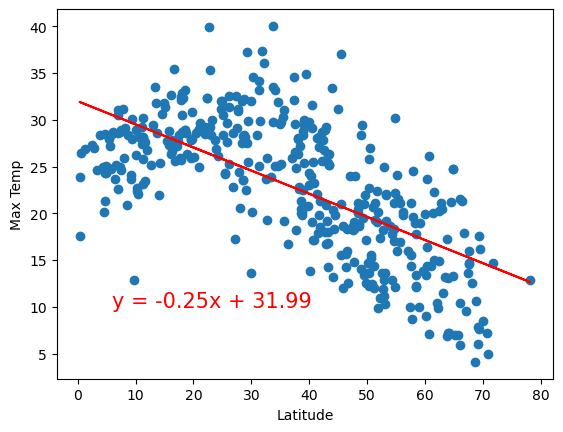

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(6,10))

The r-value is: 0.6412536792025553


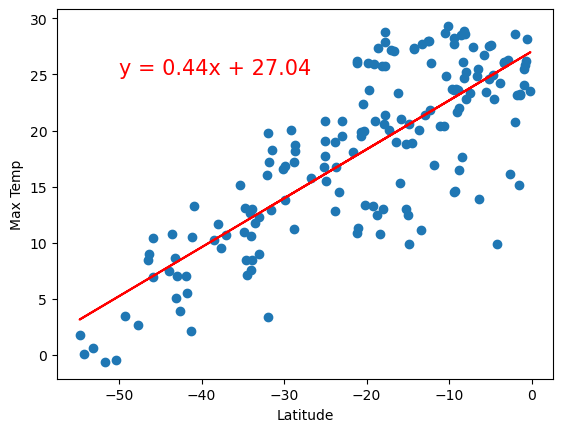

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50,25))

**Discussion about the linear relationship:** Looking at the two graphs plus the rvalues it shows a strong positive correlation. The rvalue is the biggest supporter of this due to it being close ~0.5 which is a clear sign of postive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00021043209091328513


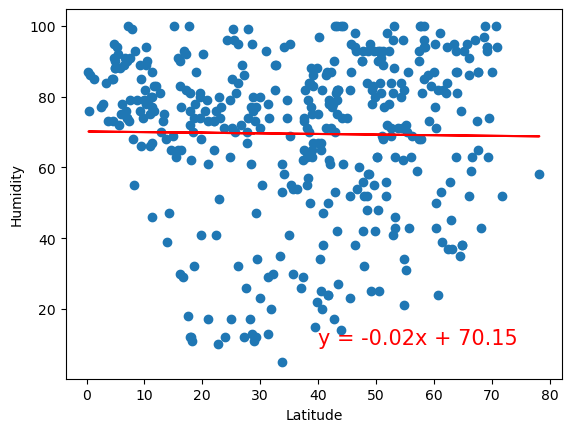

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,10))

The r-value is: 0.014145293041998004


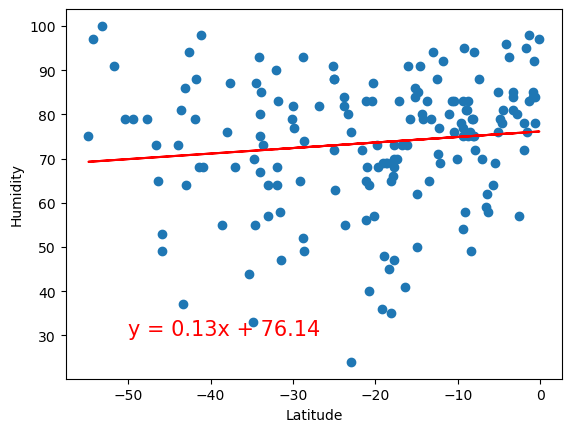

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,30))

**Discussion about the linear relationship:** The lower rvalues in this set of data indicates that there is far less correlation between latitude and humidty as there was between latitude and max temperatures. Both rvalues were quite insignificant sitting far below ~0.5

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


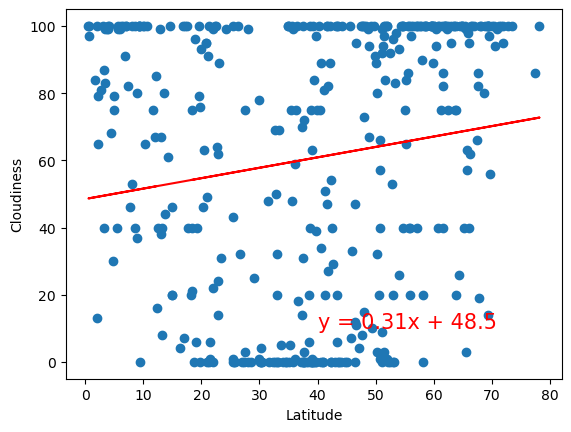

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness" )

The r-value is: 0.011138437330852706


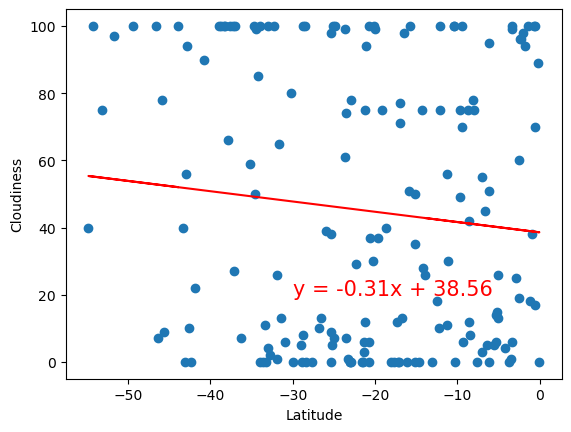

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,20))

**Discussion about the linear relationship:** Just like what we saw with Latitude vs. Humidity we see that cloudiness and latitude also have a very low correlation as seen in the rvalues

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008849779159933797


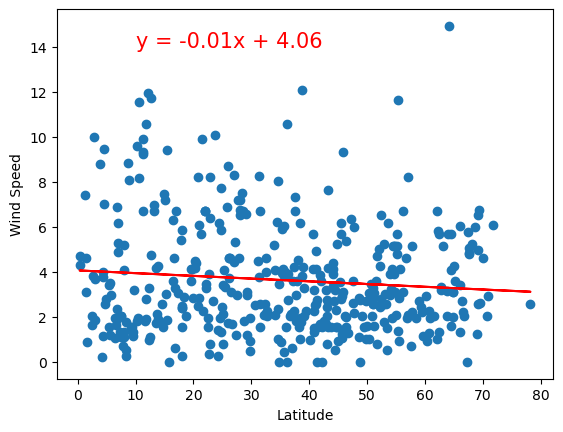

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,14))

The r-value is: 0.008376408998540294


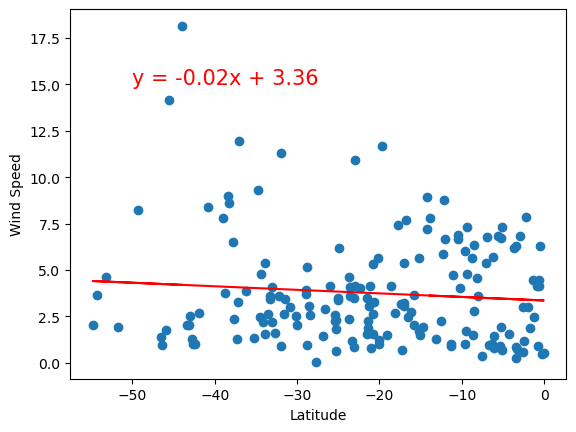

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,15))

**Discussion about the linear relationship:**  In our final graph we can see once again that latitude has little to no effect on wind speed. This is shown by the low rvalue. Overall we can conclude 1 thing only for certain and that is the strong correlation of temperature to latitude.